# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Initialize base url and lists to access and store data

url = "http://api.openweathermap.org/data/2.5/weather?"
weather_response_list = []
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

print('''Beginning Data Retrieval
-----------------------------''')

# Loop through cities list and pull all relavent data from OpenWeather

i = 0
while i < len(cities):
    time.sleep(1)
    query_url = f"{url}appid={weather_api_key}&q={cities[i]}&units=imperial"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_list.append(weather_json["name"])
        lat_list.append(weather_json["coord"]["lat"])
        lng_list.append(weather_json["coord"]["lon"])
        max_temp_list.append(weather_json["main"]["temp_max"])
        humidity_list.append(weather_json["main"]["humidity"])
        cloudiness_list.append(weather_json["clouds"]["all"])
        wind_speed_list.append(weather_json["wind"]["speed"])
        country_list.append(weather_json["sys"]["country"])
        date_list.append(weather_json['dt'])
        weather_response_list.append(weather_json)
        print(f"Processing Record {i + 1} of {len(cities)} | {weather_json['name']}")
    except:
        print("City not found. Skipping...")
    i += 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# Create and display DataFrame of the data collected

cities_dict = {"City" : city_list,
             "Lat" : lat_list,
             "Lng" : lng_list,
             "Max Temp" : max_temp_list,
             "Humidity" : humidity_list,
             "Cloudiness" : cloudiness_list,
             "Wind Speed" : wind_speed_list,
             "Country" : country_list,
             "Date" : date_list}

cities_df = pd.DataFrame(cities_dict)
cities_df

In [ ]:
# Export the city data into a .csv
cities_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [2]:
# Pull data from output file to have a working DataFrame
cities_df = pd.read_csv(output_data_file)
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.11,78,54,22.57,PF,1660436580
1,Moundou,8.5667,16.0833,69.67,98,81,4.23,TD,1660436581
2,Mar del Plata,-38.0023,-57.5575,57.94,57,0,25.99,AR,1660436527
3,Ancud,-41.8697,-73.8203,45.32,80,23,22.41,CL,1660436584
4,Foumbot,5.5079,10.6356,64.51,96,100,3.04,CM,1660436585
...,...,...,...,...,...,...,...,...,...
584,Ulaanbaatar,47.9077,106.8832,57.33,82,75,6.71,MN,1660437446
585,Lucapa,-8.4192,20.7447,66.60,31,5,3.42,AO,1660437447
586,Soyo,-6.1349,12.3689,69.17,83,80,3.94,AO,1660437449
587,Arrondissement de Mayenne,48.3333,-0.6667,74.64,35,100,6.53,FR,1660437450


In [3]:
# Finds max temp overall and shows no city has a max temp over 100%
max(cities_df["Humidity"].unique())

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### This plot shows the each city's latitude and max temperature as a point in a two-dimensional plane.

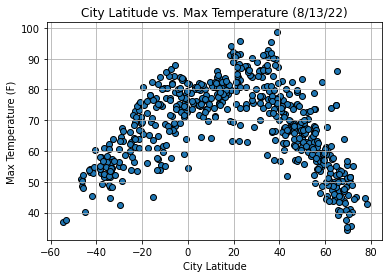

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], edgecolors = "black")
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (8/13/22)")
plt.show()
plt.savefig("output_data\Fig1.png")

## Latitude vs. Humidity Plot

#### This plot shows the each city's latitude and humidity as a point in a two-dimensional plane.

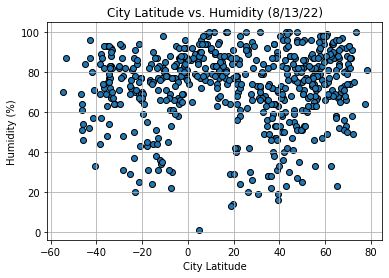

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], edgecolors = "black")
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel(f"Humidity (%)")
plt.title(f"City Latitude vs. Humidity (8/13/22)")
plt.show()
plt.savefig("output_data\Fig2.png")

## Latitude vs. Cloudiness Plot

#### This plot shows the each city's latitude and cloudiness as a point in a two-dimensional plane.

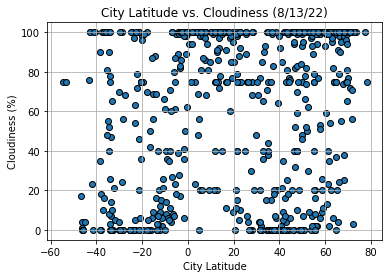

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], edgecolors = "black")
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (8/13/22)")
plt.show()
plt.savefig("output_data\Fig3.png")

## Latitude vs. Wind Speed Plot

#### This plot shows the each city's latitude and wind speed as a point in a two-dimensional plane.

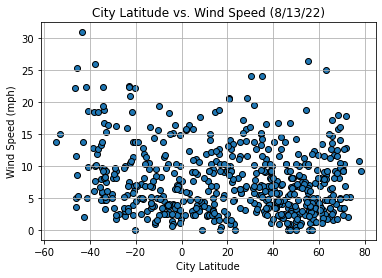

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], edgecolors = "black")
plt.grid()
plt.xlabel("City Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (8/13/22)")
plt.show()
plt.savefig("output_data\Fig4.png")

## Linear Regression

#### Initialize northern and southern hemisphere data frames

In [24]:
cities_north_df = cities_df[cities_df["Lat"] >= 0]
cities_south_df = cities_df[cities_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

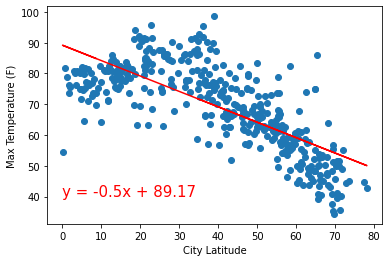

r-value is -0.7375966957747537


In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_north_df["Lat"], cities_north_df["Max Temp"])
regress_values = (cities_north_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_north_df["Lat"], cities_north_df["Max Temp"])
plt.plot(cities_north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 40), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.show()
print(f"r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

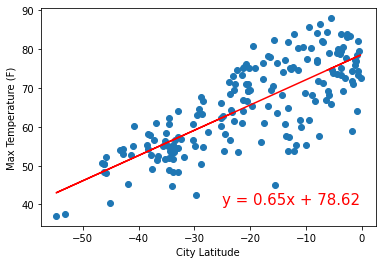

r-value is 0.7763091184898383


In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_south_df["Lat"], cities_south_df["Max Temp"])
regress_values = (cities_south_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_south_df["Lat"], cities_south_df["Max Temp"])
plt.plot(cities_south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 40), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.show()
print(f"r-value is {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

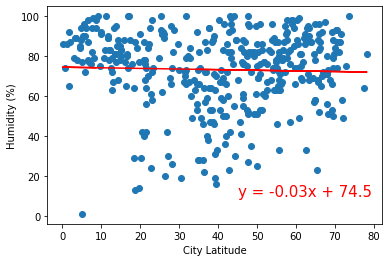

r-value is -0.03247954521637506


In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_north_df["Lat"], cities_north_df["Humidity"])
regress_values = (cities_north_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_north_df["Lat"], cities_north_df["Humidity"])
plt.plot(cities_north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 10), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Humidity (%)")
plt.show()
print(f"r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

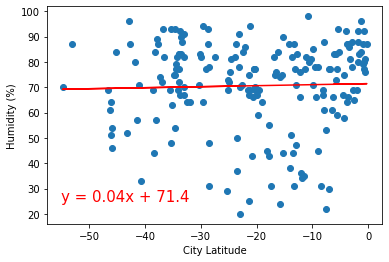

r-value is 0.031172845491706604


In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_south_df["Lat"], cities_south_df["Humidity"])
regress_values = (cities_south_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_south_df["Lat"], cities_south_df["Humidity"])
plt.plot(cities_south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 25), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Humidity (%)")
plt.show()
print(f"r-value is {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

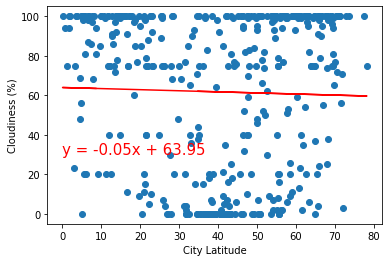

r-value is -0.027750602639174105


In [39]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_north_df["Lat"], cities_north_df["Cloudiness"])
regress_values = (cities_north_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_north_df["Lat"], cities_north_df["Cloudiness"])
plt.plot(cities_north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 30), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.show()
print(f"r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

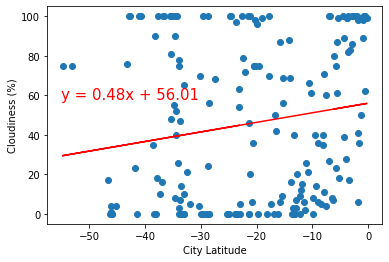

r-value is 0.16646849418216697


In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_south_df["Lat"], cities_south_df["Cloudiness"])
regress_values = (cities_south_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_south_df["Lat"], cities_south_df["Cloudiness"])
plt.plot(cities_south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 58), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.show()
print(f"r-value is {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

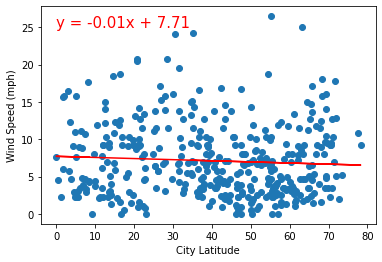

r-value is -0.061460427470251745


In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_north_df["Lat"], cities_north_df["Wind Speed"])
regress_values = (cities_north_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_north_df["Lat"], cities_north_df["Wind Speed"])
plt.plot(cities_north_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (0, 25), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.show()
print(f"r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

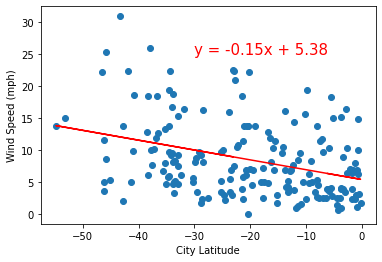

r-value is -0.3537851783557903


In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(cities_south_df["Lat"], cities_south_df["Wind Speed"])
regress_values = (cities_south_df["Lat"] * slope) + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(cities_south_df["Lat"], cities_south_df["Wind Speed"])
plt.plot(cities_south_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-30, 25), color = "red", fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel(f"Wind Speed (mph)")
plt.show()
print(f"r-value is {rvalue}")